In [1]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.interpolate as sci

import gala.coordinates as gc

import galstreams
from pyia import GaiaData

In [69]:
import galstreams
mwsts = galstreams.MWStreams(verbose=False, implement_Off=False)
mwsts.get_track_names_for_stream('Pal')

Initializing galstreams library from master_log... 


['Cetus-Palca-T21',
 'Cetus-Palca-Y21',
 'Pal13-S20',
 'Pal15-M17',
 'Pal5-I21',
 'Pal5-PW19',
 'Pal5-S20',
 'Palca-S18']

In [70]:
mwsts.summary

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,dec_f,distance_f,ra_mid,dec_mid,distance_mid,ra_pole,dec_pole,InfoFlags,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
20.0-1-M18,po,True,20.0-1-M18,20.0-1,mateu2018,Mateu2018,-,36.619756,280.225879,-41.031405,...,-16.281973,25.126725,298.182168,-29.913159,26.839948,235.758575,38.821881,0000,Mateu2018,1
300S-F18,st,True,300S-F18,300S,fu2018,Fu2018,-,11.084050,151.800005,16.046962,...,14.448969,14.350060,157.510431,15.343949,15.929409,308.056470,72.509388,1101,"NiedersteOstholt2009,Simon2011",2
AAU-AliqaUma-L21,st,True,AAU-AliqaUma-L21,AAU-AliqaUma,li2021,Li2021,-,9.677187,0.417097,-15.901759,...,-20.427757,24.636741,4.915075,-18.117867,26.923444,64.503226,57.120874,1111,Shipp2018,3
AAU-ATLAS-L21,st,True,AAU-ATLAS-L21,AAU-ATLAS,li2021,Li2021,-,23.561687,8.931901,-21.023379,...,-33.199331,18.525495,20.058646,-26.983189,20.885277,73.360646,49.567099,1111,Koposov2014,4
Acheron-G09,ep,True,Acheron-G09,Acheron,grillmair2009,Grillmair2009,-,36.532092,230.000000,-2.000000,...,21.000000,3.800000,244.604606,10.300419,3.656382,142.339428,49.453184,0000,Grillmair2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turranburra-S19,st,True,Turranburra-S19,Turranburra,shipp2019,"Shipp2019,Shipp2018",-,13.729050,59.707970,-18.554702,...,-25.275911,27.500000,67.141164,-22.183041,27.500000,123.473122,53.283631,1010,Shipp2018,93
Vid-I21,st,True,Vid-I21,Vid,ibata2021,Ibata2021,-,18.115243,17.350232,-25.248735,...,-34.861329,20.394279,25.819117,-30.331205,24.642130,80.544842,44.626077,1110,Ibata2021,94
Wambelong-S18,ep,True,Wambelong-S18,Wambelong,shipp2018,"Shipp2018,Shipp2019",-,14.162214,90.500000,-45.600000,...,-34.300000,15.100000,84.434473,-40.084053,15.100000,328.673187,-27.312855,0020,Shipp2018,95


In [71]:
mwsts.get_track_names_for_stream('Pal')

['Cetus-Palca-T21',
 'Cetus-Palca-Y21',
 'Pal13-S20',
 'Pal15-M17',
 'Pal5-I21',
 'Pal5-PW19',
 'Pal5-S20',
 'Palca-S18']

In [72]:
mwsts.get_track_names_for_stream('Pal', On_only=True)

['Cetus-Palca-T21', 'Pal13-S20', 'Pal15-M17', 'Pal5-PW19', 'Palca-S18']

In [73]:
mwsts['Pal5-PW19'].track

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(242.09382437,  6.88309503, 22.02340828),
     (242.08670244,  6.87558676, 22.02333424),
     (242.07954494,  6.86813405, 22.02325892), ...,
     (224.67592037, -4.79218842, 19.09368606),
     (224.66687368, -4.79668187, 19.09096063),
     (224.65738999, -4.80051508, 19.08823394)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-2.12850417, -2.34952027, 999.00002274),
     (-2.12922183, -2.34945636, 999.00002274),
     (-2.12993892, -2.34939303, 999.00002274), ...,
     (-2.77331871, -3.06772628, 999.00002188),
     (-2.77323034, -3.0684521 , 999.00002188),
     (-2.77314357, -3.06917651, 999.00002188)]>

In [18]:
from matplotlib.colors import LogNorm

from ugali import isochrone
from ugali.analysis.isochrone import factory as isochrone_factory

In [19]:
def plot_iso(iso):
    plt.scatter(iso.mag_1-iso.mag_2,iso.mag_1+iso.distance_modulus,marker='o',c='k')
    plt.gca().invert_yaxis()
    plt.xlabel('%s - %s'%(iso.band_1,iso.band_2)); plt.ylabel(iso.band_1)

In [23]:
age = 12. #Gyr
mu =  17.
z = 0.0002

Dotter
  Parameters:
    distance_modulus : Parameter(17.0, [10.0, 30.0], False)
    age              : Parameter(12.0, [10.0, 12.0], False)
    metallicity      : Parameter(0.0002, [0.0001, 0.0002], False)
  Filename: /home/mardom/.ugali/isochrones/ps1/dotter2016/iso_a12.0_z0.00020.dat


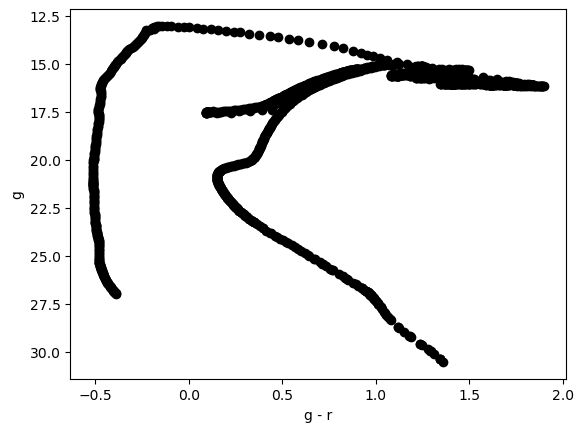

In [43]:
iso = isochrone_factory('Dotter', survey='ps1', age=age, distance_modulus=mu, z=z, band_1 = 'g', band_2 = 'r')
print(iso)
plot_iso(iso)

Dotter
  Parameters:
    distance_modulus : Parameter(17.0, [10.0, 30.0], False)
    age              : Parameter(12.0, [10.0, 12.0], False)
    metallicity      : Parameter(0.0002, [0.0001, 0.0002], False)
  Filename: /home/mardom/.ugali/isochrones/ps1/dotter2016/iso_a12.0_z0.00020.dat


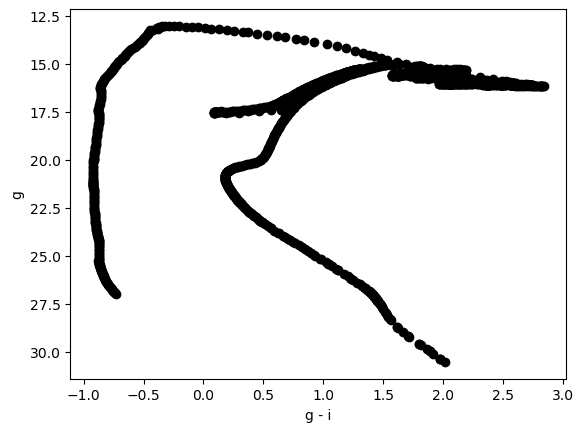

In [49]:
iso1 = isochrone_factory('Dotter', survey='ps1', age=age, distance_modulus=mu, z=z, band_1 = 'g', band_2 = 'i')
print(iso1)
plot_iso(iso1)

In [7]:
# original code from APW@Streams22

In [30]:
mws = galstreams.MWStreams(verbose=False, implement_Off=True)

Initializing galstreams library from master_log... 


In [31]:
streams = {
    'GD-1': 'GD-1-PB18',
    'Pal5': 'Pal5-PW19',
    'Jhelum': 'Jhelum-b-B19',
    'Fjorm-M68': 'M68-P19',
    'PS1-A': 'PS1-A-B16',
}

In [32]:
# name = 'GD-1'
# name = 'Fjorm-M68'
# name = 'Jhelum'
name = 'Pal5'
# name = 'PS1-A'

gaia_tbl = at.Table.read(f'../data/cats/GaiaDR3-{name}-all.fits')
ps1_tbl = at.Table.read(f'../data/cats/PS1DR2-{name}_xm.fits')


data = at.unique(
    at.join(gaia_tbl, ps1_tbl, keys='source_id'),
    keys='source_id'
)

g = GaiaData(data)
gs = mws[streams[name]]
stream_fr = gs.stream_frame
track = gs.track.transform_to(stream_fr)
track_refl = gc.reflex_correct(track)

In [33]:
phi2_interp = sci.InterpolatedUnivariateSpline(
    track.phi1.degree, track.phi2.degree,
)
dist_interp = sci.InterpolatedUnivariateSpline(
    track.phi1.degree, track.distance.value, k=3
)

In [34]:
c = g.get_skycoord(distance=False)
c_stream = c.transform_to(stream_fr)

c = g.get_skycoord(
    distance=dist_interp(c_stream.phi1.degree) * u.kpc,
    radial_velocity=0*u.km/u.s
)
c_stream = c.transform_to(stream_fr)
c_stream_refl = gc.reflex_correct(c_stream)

In [35]:
sky_track_mask = np.abs(c_stream.phi2.degree - phi2_interp(c_stream.phi1.degree)) < 0.5
off_track_mask = (
    (np.abs(c_stream.phi2.degree - phi2_interp(c_stream.phi1.degree) - 1.) < 0.25) |
    (np.abs(c_stream.phi2.degree - phi2_interp(c_stream.phi1.degree) + 1.) < 0.25)
)

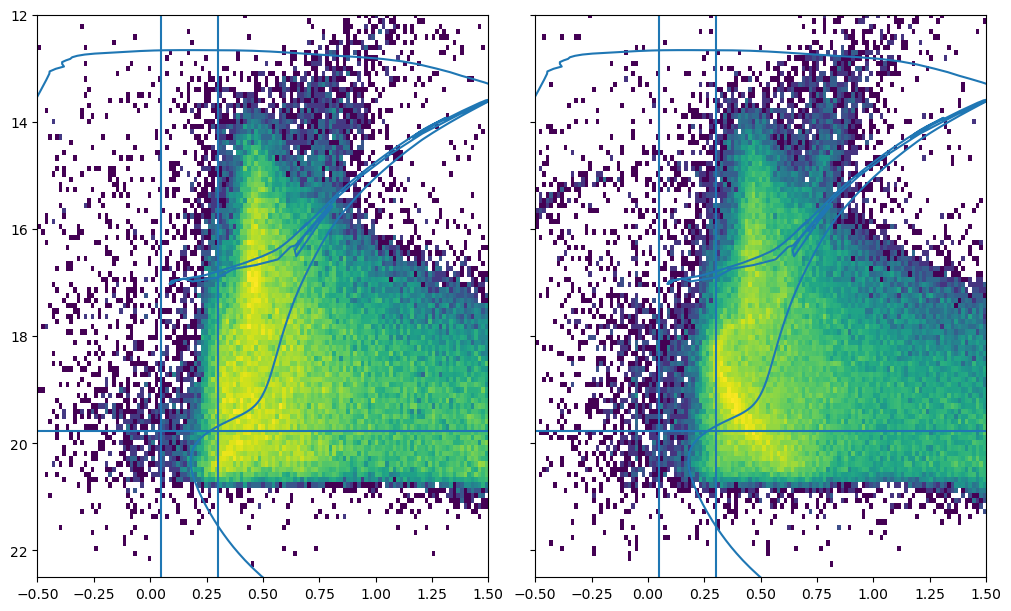

In [54]:
mask = sky_track_mask

color = g.g0 - g.i0
mag = g.r0

fig, axes = plt.subplots(
    1, 2, figsize=(10, 6), sharex=True, sharey=True, 
    constrained_layout=True
)

bins = (
    np.linspace(-0.5, 1.5, 128),
    np.linspace(10, 22.5, 128)
)
axes[0].hist2d(
    color[mask],
    mag[mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[1].hist2d(
    color[off_track_mask],
    mag[off_track_mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[0].set_ylim(22.5, 12)

for ax in axes:
    ax.plot(
        iso1.mag_1 - iso1.mag_2, 
        iso.mag_2 + coord.Distance(dist_interp(0.)*u.kpc).distmod.value, 
        marker='',
        color='tab:blue'
    )

    color_cut = 0.3
    mag_cut = 3.2 + coord.Distance(dist_interp(0.)*u.kpc).distmod.value
    ax.axvline(color_cut)
    ax.axvline(0.05)
    ax.axhline(mag_cut)

ms_box_mask = (
    (color < color_cut) & (color > 0.05) &
    (mag > mag_cut)
)

Text(0, 0.5, '$\\mu_{\\phi_2}$')

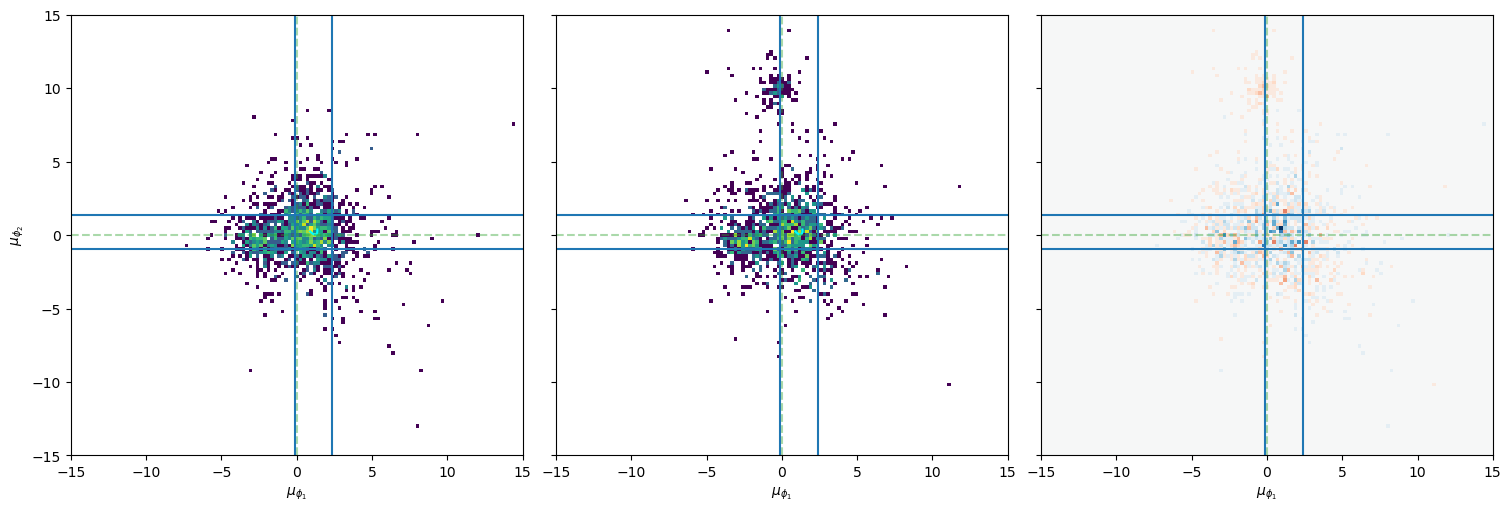

In [55]:
mask = sky_track_mask & ms_box_mask
off_mask = off_track_mask & ms_box_mask

# pm1_cut = (0., 2)
# pm2_cut = (-1, 2)
if np.all(track.pm_phi1_cosphi2.value == 0):
    print("no proper motion info: selecting broadly")
    pm1_cut = (-10, 10)
    pm2_cut = (-1.5, 1.5)
    
else:
    pm1_cut = (
        track_refl.pm_phi1_cosphi2.value.min() - 1.,
        track_refl.pm_phi1_cosphi2.value.max() + 1.
    )
    pm2_cut = (
        track_refl.pm_phi2.value.min() - 1.,
        track_refl.pm_phi2.value.max() + 1.
    )

pm1_mask = (
    (c_stream_refl.pm_phi1_cosphi2.value > pm1_cut[0]) &
    (c_stream_refl.pm_phi1_cosphi2.value < pm1_cut[1])
)
pm2_mask = (
    (c_stream_refl.pm_phi2.value > pm2_cut[0]) &
    (c_stream_refl.pm_phi2.value < pm2_cut[1])
)
pm_box_mask = pm1_mask & pm2_mask

fig, axes = plt.subplots(
    1, 3,
    figsize=(15, 5), sharex=True, sharey=True, 
    constrained_layout=True
)

bins = np.linspace(-15, 15, 128)
H1, xe, ye, _ = axes[0].hist2d(
    c_stream_refl.pm_phi1_cosphi2.value[mask],
    c_stream_refl.pm_phi2.value[mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)
H2, *_ = axes[1].hist2d(
    c_stream_refl.pm_phi1_cosphi2.value[off_mask],
    c_stream_refl.pm_phi2.value[off_mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[2].pcolormesh(xe, ye, (H1 - H2).T, cmap='RdBu', vmin=-10, vmax=10)

for ax in axes[:2]:
    ax.plot(
        track_refl.pm_phi1_cosphi2.value,
        track_refl.pm_phi2.value,
        color='cyan'
    )
    
for ax in axes:
    ax.axhline(0., linestyle='--', color='tab:green', alpha=0.4)
    ax.axvline(0., linestyle='--', color='tab:green', alpha=0.4)

    for x in pm1_cut:
        ax.axvline(x)
    for x in pm2_cut:
        ax.axhline(x)
    
    ax.set_xlabel(r'$\mu_{\phi_1}$')
axes[0].set_ylabel(r'$\mu_{\phi_2}$')

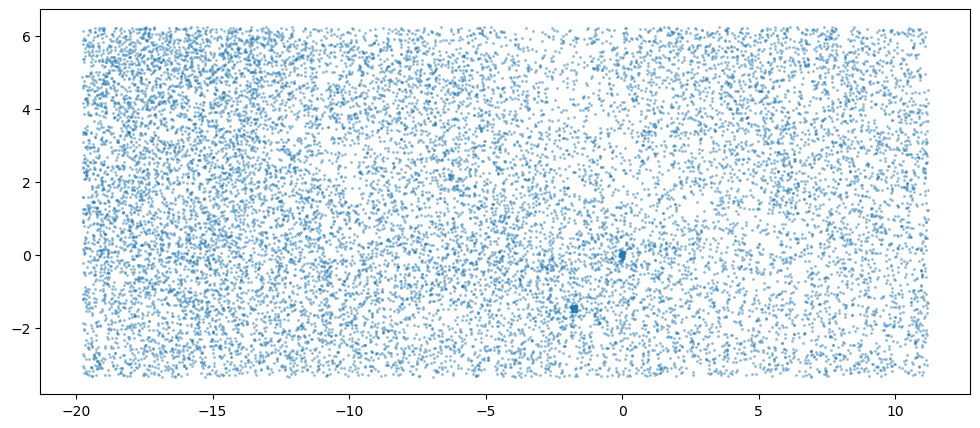

In [56]:
mask = ms_box_mask

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    c_stream.phi1.degree[mask],
    c_stream.phi2.degree[mask],
    ls='none', 
    marker='o',
    mew=0,
    ms=2.,
    alpha=0.5
);

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(242.09382437,  6.88309503, 22.02340828),
     (242.08670244,  6.87558676, 22.02333424),
     (242.07954494,  6.86813405, 22.02325892), ...,
     (224.67592037, -4.79218842, 19.09368606),
     (224.66687368, -4.79668187, 19.09096063),
     (224.65738999, -4.80051508, 19.08823394)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(-2.12850417, -2.34952027, 999.00002274),
     (-2.12922183, -2.34945636, 999.00002274),
     (-2.12993892, -2.34939303, 999.00002274), ...,
     (-2.77331871, -3.06772628, 999.00002188),
     (-2.77323034, -3.0684521 , 999.00002188),
     (-2.77314357, -3.06917651, 999.00002188)]>

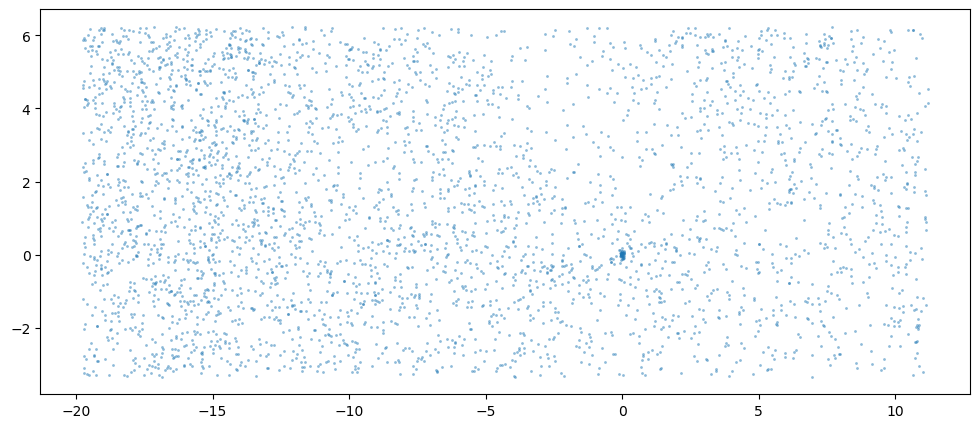

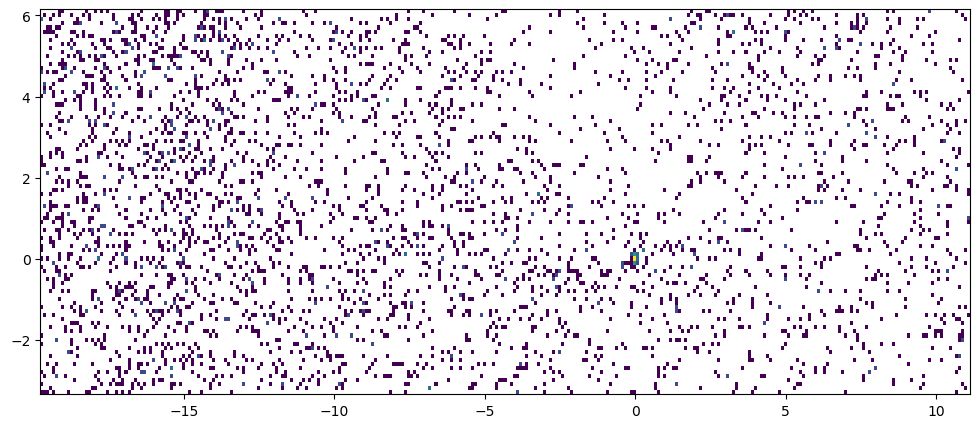

In [79]:
mask = ms_box_mask & pm_box_mask

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(
    c_stream.phi1.degree[mask],
    c_stream.phi2.degree[mask],
    ls='none', 
    marker='o',
    mew=0,
    ms=2.,
    alpha=0.5
);

fig, ax = plt.subplots(figsize=(12, 5))
ax.hist2d(
    c_stream.phi1.degree[mask],
    c_stream.phi2.degree[mask],
    bins=(np.arange(c_stream.phi1.degree.min(), c_stream.phi1.degree.max(), 0.1),
          np.arange(c_stream.phi2.degree.min(), c_stream.phi2.degree.max(), 0.1)),
    norm=mpl.colors.LogNorm()
);

#ax.plot(track_stream.phi1.degree, track_stream.phi2.degree)
#track_stream = mwsts['Pal5-PW19'].track.
#ax.plot(mwsts['Pal5-PW19'].track.phi1, mwsts['Pal5-PW19'].track.phi2)


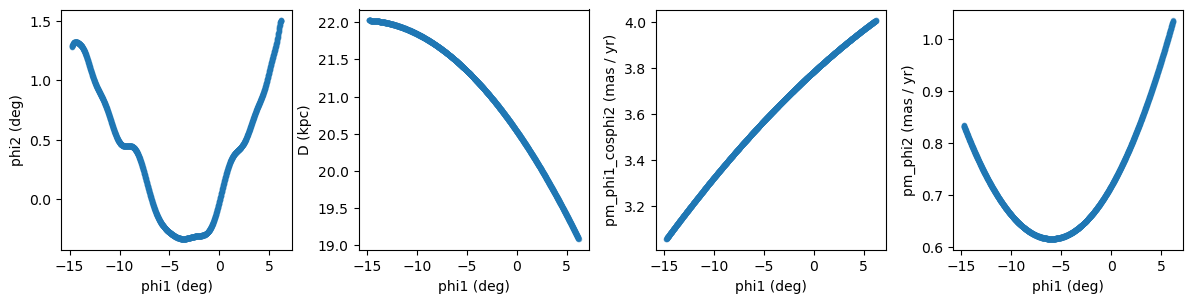

In [86]:
fr = mwsts['Pal5-PW19'].stream_frame
galstreams.plot_5D_tracks_subplots_row(mwsts['Pal5-PW19'].track, frame = fr , show_ylabels=True)

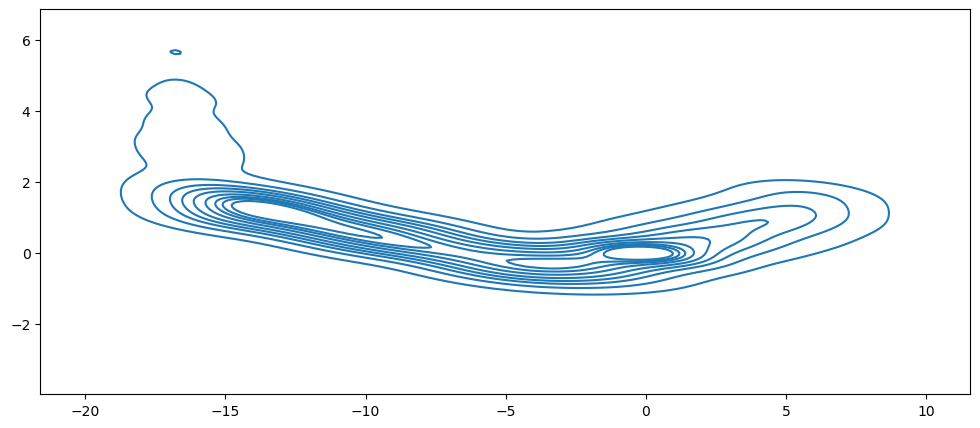

In [65]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.kdeplot(x = c_stream.phi1.degree[mask], y = c_stream.phi2.degree[mask], levels=10)

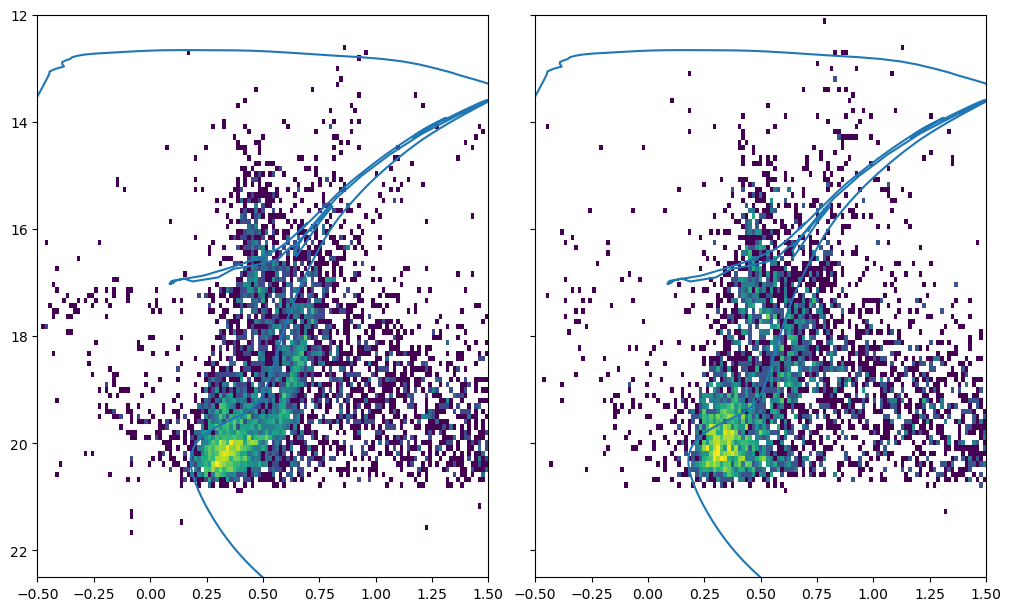

In [59]:
mask = sky_track_mask & pm_box_mask
off_mask = off_track_mask & pm_box_mask

color = g.g0 - g.i0
mag = g.r0

fig, axes = plt.subplots(
    1, 2, figsize=(10, 6), sharex=True, sharey=True, 
    constrained_layout=True
)

bins = (
    np.linspace(-0.5, 1.5, 128),
    np.linspace(10, 22.5, 128)
)
axes[0].hist2d(
    color[mask],
    mag[mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[1].hist2d(
    color[off_mask],
    mag[off_mask],
    bins=bins,
    norm=mpl.colors.LogNorm()
)

axes[0].set_ylim(22.5, 12)

for ax in axes:
    ax.plot(
        iso1.mag_1 - iso1.mag_2, 
        iso.mag_2  + coord.Distance((dist_interp(0.))*u.kpc).distmod.value, 
        marker='',
        color='tab:blue'
    )

